In [55]:
%matplotlib inline

In [56]:
import numpy as np
import matplotlib.pyplot as plt

from urllib.request import urlretrieve
import pandas as pd

from csv import reader
from random import seed
from random import randrange

from math import sqrt
from math import pi
from math import exp

import sympy

import seaborn as sns

***
<h1 style="color: blue;">Overview of the basics</h1>

For a random variable $x$, $P(x)$ is a function that assigns a probability to all values of $x$.

- Probability Density of $x = P(x)$

The probability of a specific event A for a random variable x is denoted as P(x=A), or simply as P(A).

- Probability of Event $A = P(A)$

Probability is calculated as the number of desired outcomes divided by the total possible outcomes, in the case where all outcomes are equally likely.

- Probability = ${\large \frac{number-of-desired-outcomes}{total-number-of-possible-outcomes}}$

>This is intuitive if we think about a discrete random variable such as the roll of a dice. For example, the probability of a dice rolling a 5 is calculated as one outcome of rolling a 5 (1) divided by the total number of discrete outcomes (6) or 1/6 or about 0.1666 or about 16.666%.

In [57]:
# Here is a simple preview of probability calculator
def probability(desired_outcomes, total_outcomes):
    probability = desired_outcomes / total_outcomes
    
    if desired_outcomes == 12:
        color = "green"
    elif desired_outcomes == 8:
        color = "blue"
    elif desired_outcomes == 2:
        color = "red"
    elif desired_outcomes == total_outcomes:
        color = "(all)"
    else:
        color = "yellow"
  
    print(f"The probability of taking {desired_outcomes} {color} ball(s) is:", str(round(probability*100, 2))+"%")
    return probability # Probability is a number between 0 and 1. 1 Denoting 100% and 0 denoting 0%

# Let's say I have 12 Green balls, 8 blue balls, 2 red balls and 1 yellow ball
# What is the probability of reaching and taking 1 yellow ball?

total_balls = 12 + 8 + 2 + 1
desired_balls = 2 # Play around with this variable to see how different portions react

probability(desired_balls, total_balls)

The probability of taking 2 red ball(s) is: 8.7%


0.08695652173913043

The sum of the probabilities of all outcomes must equal one. If not, I do not have valid probabilities.

- Sum of the Probabilities for All Outcomes = 1.0.

In [58]:
green_balls = 12
blue_balls = 8
red_balls = 2
yellow_balls = 1

total_sum = probability(green_balls, total_balls) + probability(blue_balls,total_balls) + probability(red_balls,total_balls)+ probability(yellow_balls,total_balls) 

print("Sum of all probabilities:", total_sum*100, "%")

The probability of taking 12 green ball(s) is: 52.17%
The probability of taking 8 blue ball(s) is: 34.78%
The probability of taking 2 red ball(s) is: 8.7%
The probability of taking 1 yellow ball(s) is: 4.35%
Sum of all probabilities: 100.0 %


The probability of an impossible outcome is zero. For example, it is impossible to roll a 7 with a standard six-sided die.

- Probability of Impossible Outcome = 0.0

The probability of a certain outcome is one. For example, it is certain that a value between 1 and 6 will occur when rolling a six-sided die.

- Probability of Certain Outcome = 1.0

In [59]:
print("Probability of certain outcome:", probability(total_balls, total_balls)*100, "%")

The probability of taking 23 (all) ball(s) is: 100.0%
Probability of certain outcome: 100.0 %


The probability of an event not occurring, called the complement.

This can be calculated by one minus the probability of the event, or 1 – P(A). For example, the probability of not rolling a 5 would be 1 – P(5) or 1 – 0.166 or about 0.833 or about 83.333%.

- Probability of Not Event $A = 1 – P(A)$

In [60]:
# Lets take the probability of 12 green balls
green_balls = 12
draw_probability = probability(green_balls, total_balls)

print("Probability of Not Event:", str(round((1 - draw_probability)*100, 2)), "%")

The probability of taking 12 green ball(s) is: 52.17%
Probability of Not Event: 47.83 %


## Bayes Theorem of Conditional Probability
Before diving into Bayes theorem, let’s review marginal, joint, and conditional probability.

Recall that marginal probability is the probability of an event, irrespective of other random variables. If the random variable is independent, then it is the probability of the event directly, otherwise, if the variable is dependent upon other variables, then the marginal probability is the probability of the event summed over all outcomes for the dependent variables, called the sum rule.

- **Marginal Probability**: The probability of an event irrespective of the outcomes of other random variables, e.g. $P(A)$.

The joint probability is the probability of two (or more) simultaneous events, often described in terms of events A and B from two dependent random variables, e.g. X and Y. The joint probability is often summarized as just the outcomes, e.g. A and B.

- **Joint Probability**: Probability of two (or more) simultaneous events, e.g. $P(A and B)$ or $P(A, B)$.

The conditional probability is the probability of one event given the occurrence of another event, often described in terms of events A and B from two dependent random variables e.g. X and Y.

- **Conditional Probability**: Probability of one (or more) event given the occurrence of another event, e.g. $P(A given B)$ or $P(A | B)$.

## Joint probability distribution
Now let's see what happens if we roll two dice. For each die, the outcomes are associated with a certain probability. We need two random variables to describe the game, let's say that $\text{x}$ corresponds to the first die and $\text{y}$ to the second one. We also have two probability mass functions associated with the random variables: $P(\text{x})$ and $P(\text{y})$. Here the possible values of the random variables (1, 2, 3, 4, 5 or 6) and the probability mass functions are actually the same for both dice, but it doesn't need to be the case.

The joint probability distribution is useful in the cases where we are interested in the probability that $\text{x}$ takes a specific value while $\text{y}$ takes another specific value. For instance, what would be the probability to get a 1 with the first dice and 2 with the second dice? The probabilities corresponding to every pair of values are written $P(\text{x}=x, \text{y}=y)$ or $P(\text{x}, \text{y})$. This is what we call the joint probability.

### Example 1.

For example, let's calculate the probability to have a 1 with the first dice and a 2 in the second:

$$
P(\text{x}=1, \text{y}=2) = \frac{1}{6} \times \frac{1}{6} = \frac{1}{36} \approx 0.028
$$

***

The conditional probability is the probability of one event given the occurrence of another event, often described in terms of events A and B from two dependent random variables e.g. $X$ and $Y$.

- Conditional Probability: Probability of one (or more) event given the occurrence of another event, e.g. $P(A given B)$ or $P(A | B)$.

The joint probability can be calculated using the conditional probability; for example:

- $P(A, B) = P(A | B) * P(B)$

This is called the product rule. Importantly, the joint probability is symmetrical, meaning that:

- $P(A, B) = P(B, A)$

The conditional probability can be calculated using the joint probability; for example:

- $P(A | B) = P(A, B) / P(B)$

The conditional probability is not symmetrical; for example:

- $P(A | B) != P(B | A)$

# What is Naive Bayes algorithm?

   It is a classification technique based on Bayes’ Theorem with an assumption of independence among predictors. In simple terms, a Naive Bayes classifier assumes that the presence of a particular feature in a class is unrelated to the presence of any other feature.

   For example, a fruit may be considered to be an apple if it is red, round, and about 3 inches in diameter. Even if these features depend on each other or upon the existence of the other features, all of these properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

   Naive Bayes model is easy to build and particularly useful for very large data sets. Along with simplicity, Naive Bayes is known to outperform even highly sophisticated classification methods.

   Bayes theorem provides a way of calculating posterior probability $P(c|x)$ from $P(c)$, $P(x)$ and $P(x|c)$. Look at the equation below:


<br>

\begin{align}
{\large P(c|x) = \frac{P(x|c)P(c)}{P(x)}}
\end{align}

<br>

## Naming the Terms in the Theorem
The terms in the Bayes Theorem equation are given names depending on the context where the equation is used.

Firstly, in general, the result $P(A|B)$ is referred to as the **posterior probability** and $P(A$) is referred to as the **prior probability**.

- $P(A|B)$: Posterior probability.
- $P(A)$: Prior probability.

Sometimes $P(B|A)$ is referred to as the **likelihood** and $P(B)$ is referred to as the **evidence**.

- $P(B|A)$: Likelihood.
- $P(B)$: Evidence.

This allows Bayes Theorem to be restated as:

- **Posterior = Likelihood * Prior / Evidence**

I can make this clear with a smoke and fire case.

What is the probability that there is fire given that there is smoke?

Where P(Fire) is the Prior, P(Smoke|Fire) is the Likelihood, and P(Smoke) is the evidence:

- $P(Fire|Smoke)$ = $P(Smoke|Fire)$ * $P(Fire) / P(Smoke)$

You can imagine the same situation with rain and clouds.

### Diagnostic Test Scenario
An excellent and widely used example of the benefit of Bayes Theorem is in the analysis of a medical diagnostic test.

Scenario: Consider a human population that may or may not have cancer (Cancer is True or False) and a medical test that returns positive or negative for detecting cancer (Test is Positive or Negative), e.g. like a mammogram for detecting breast cancer.

>Problem: If a randomly selected patient has the test and it comes back positive, what is the probability that the patient has cancer?

### Manual Calculation
Medical diagnostic tests are not perfect; they have **error**.

Sometimes a patient will have cancer, but the test will not detect it. This capability of the test to detect cancer is referred to as the sensitivity, or the **true positive rate**.

In this case, I will contrive a sensitivity value for the test. The test is good, but not great, with a true positive rate or sensitivity of $85%$. That is, of all the people who have cancer and are tested, $85%$ of them will get a positive result from the test.

- $P(Test=Positive | Cancer=True) = 0.85$

Given this information, our intuition would suggest that there is an 85% probability that the patient has cancer.

**Our intuitions of probability are wrong.**

This type of error in interpreting probabilities is so common that it has its own name; it is referred to as the **base rate fallacy**.

It has this name because the error in estimating the probability of an event is caused by ignoring the base rate. That is, it ignores the probability of a randomly selected person having cancer, regardless of the results of a diagnostic test.

In this case, I can assume the probability of breast cancer is low, and use a contrived base rate value of one person in 5,000, or (0.0002) 0.02%.

- $P(Cancer=True) = 0.02%$.

I can correctly calculate the probability of a patient having cancer given a positive test result using Bayes Theorem.

Let’s map our scenario onto the equation:

- $P(A|B) = P(B|A) * P(A) / P(B)$

- $P(Cancer=True | Test=Positive)$ = $P(Test=Positive|Cancer=True)$ * $P(Cancer=True)$ / $P(Test=Positive)$

I know the probability of the test being positive given that the patient has cancer is 85%, and I know the base rate or the prior probability of a given patient having cancer is 0.02%; I can plug these values in:

- $P(Cancer=True | Test=Positive)$ = 0.85 * 0.0002 / $P(Test=Positive)$

I **don’t know** $P(Test=Positive)$, it’s not given directly.

Instead, we can estimate it using:

- $P(B)$ = $P(B|A)$ * $P(A)$ + $P(B|not A)$ * $P(not A)$

- $P(Test=Positive)$ = $P(Test=Positive|Cancer=True)$ * $P(Cancer=True)$ + $P(Test=Positive|Cancer=False)$ * $P(Cancer=False)$

Firstly, we can calculate $P(Cancer=False)$ as the complement of $P(Cancer=True)$, which we already know

- $P(Cancer=False)$ = 1 – $P(Cancer=True)$
- = 1 – 0.0002
- = 0.9998

Let’s plugin what we have:

We can plug in our known values as follows:

- $P(Test=Positive)$ = 0.85 * 0.0002 + $P(Test=Positive|Cancer=False)$ * 0.9998

We still do not know the probability of a positive test result given no cancer.

This requires additional information.

Specifically, we need to know how good the test is at correctly identifying people that do not have cancer. That is, testing negative result $(Test=Negative)$ when the patient does not have cancer $(Cancer=False)$, called the **true negative rate** or the specificity.

We will use a contrived specificity value of 95%.

- $P(Test=Negative | Cancer=False)$ = 0.95

With this final piece of information, we can calculate the **false positive** or **false alarm rate** as the complement of the **true negative rate**.

- $P(Test=Positive|Cancer=False)$ = 1 – $P(Test=Negative | Cancer=False)$
- = 1 – 0.95
- = 0.05

We can plug this false alarm rate into our calculation of $P(Test=Positive)$ as follows:

- $P(Test=Positive)$ = 0.85 * 0.0002 + 0.05 * 0.9998
- $P(Test=Positive)$ = 0.00017 + 0.04999
- $P(Test=Positive)$ = 0.05016

Excellent, so the probability of the test returning a positive result, regardless of whether the person has cancer or not is about **5%**.

We now have enough information to calculate Bayes Theorem and estimate the probability of a randomly selected person having cancer if they get a positive test result.

- $P(Cancer=True | Test=Positive)$ = $P(Test=Positive|Cancer=True)$ * $P(Cancer=True)$ / $P(Test=Positive)$
- $P(Cancer=True | Test=Positive)$ = 0.85 * 0.0002 / 0.05016
- $P(Cancer=True | Test=Positive)$ = 0.00017 / 0.05016
- $P(Cancer=True | Test=Positive)$ = 0.003389154704944

The calculation suggests that if the patient is informed they have cancer with this test, then there is only 0.33% chance that they have cancer.

**It is a terrible diagnostic test!**

The example also shows that the calculation of the conditional probability requires enough information.

For example, if we have the values used in Bayes Theorem already, we can use them directly.

This is rarely the case, and we typically have to calculate the bits we need and plug them in, as we did in this case. In our scenario we were given 3 pieces of information, the base rate, the  sensitivity (or true positive rate), and the specificity (or true negative rate).

- Sensitivity: 85% of people with cancer will get a positive test result.
- Base Rate: 0.02% of people have cancer.
- Specificity: 95% of people without cancer will get a negative test result.

I did not have the $P(Test=Positive)$, but we calculated it given what we already had available.

I might imagine that Bayes Theorem allows us to be even more precise about a given scenario. For example, if we had more information about the patient (e.g. their age) and about the domain (e.g. cancer rates for age ranges), and in turn we could offer an even more accurate probability estimate.

In [61]:
# calculate the probability of cancer patient and diagnostic test
 
# calculate P(A|B) given P(A), P(B|A), P(B|not A)
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    # calculate P(not A)
    not_a = 1 - p_a
    # calculate P(B)
    p_b = p_b_given_a * p_a + p_b_given_not_a * not_a
    # calculate P(A|B)
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b
 
# P(A)
p_a = 0.0002
# P(B|A)
p_b_given_a = 0.85
# P(B|not A)
p_b_given_not_a = 0.05
# calculate P(A|B)
result = bayes_theorem(p_a, p_b_given_a, p_b_given_not_a)
# summarize
print('P(A|B) = %.3f%%' % (result * 100))

P(A|B) = 0.339%


## How does Naive Bayes algorithm work?
Let’s understand it using an example. Below I have taken a training data set of weather and corresponding target variable ‘Play’ (suggesting possibilities of playing). Now, I need to classify whether players will play or not based on weather condition.

- Step 1: Convert the data set into a frequency table

- Step 2: Create Likelihood table by finding the probabilities like Overcast probability = 0.29 and probability of playing is 0.64.

<img src="./images/NaiveBayesianFootball.webp"/>

- Step 3: Now, use Naive Bayesian equation to calculate the posterior probability for each class. The class with the highest posterior probability is the outcome of prediction.

**Problem: Players will play if weather is sunny. Is this statement correct?**

Now let's solve it.

$P(Yes | Sunny)$ = $P( Sunny | Yes)$ * $P(Yes)$ / $P(Sunny)$

Here I have $P(Sunny |Yes)$ = 3/9 = 0.33, $P(Sunny)$ = 5/14 = 0.36, $P(Yes)$= 9/14 = 0.64

Now, $P(Yes | Sunny)$ = 0.33 * 0.64 / 0.36 = 0.60, which has higher probability.

Naive Bayes uses a similar method to predict the probability of different class based on various attributes. This algorithm is mostly used in text classification and with problems having multiple classes.

## Some of the applications of Naive Bayes Algorithms
Real time Prediction: Naive Bayes is an eager learning classifier and it is sure fast. Thus, it could be used for making predictions in real time.
- Multi class Prediction: This algorithm is also well known for multi class prediction feature. Here I can predict the probability of multiple classes of target variable.
- Text classification/ Spam Filtering/ Sentiment Analysis: Naive Bayes classifiers mostly used in text classification (due to better result in multi class problems and independence rule) have higher success rate as compared to other algorithms. As a result, it is widely used in Spam filtering (identify spam e-mail) and Sentiment Analysis (in social media analysis, to identify positive and negative customer sentiments)
- Recommendation System: Naive Bayes Classifier and Collaborative Filtering together builds a Recommendation System that uses machine learning and data mining techniques to filter unseen information and predict whether a user would like a given resource or not

# Iris Flower Species Dataset
The Iris Flower Dataset involves predicting the flower species given measurements of iris flowers.

It is a multiclass classification problem. The number of observations for each class is balanced. There are 150 observations with 4 input variables and 1 output variable. The variable names are as follows:

- Sepal length in cm.
- Sepal width in cm.
- Petal length in cm.
- Petal width in cm.
- Class

A sample of the first 4 rows is listed below.
```python
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
...
```

<a href="https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.names">More Information on Dataset (iris.names)</a>

In [62]:
# Preview of the dataset
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

filename = './datasets/iris.csv'
dataset2 = load_csv(filename)

urlretrieve(iris)

df = pd.read_csv(iris, sep=',')

attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

dataset2[:10]

[['5.1,3.5,1.4,0.2,Iris-setosa'],
 ['4.9,3.0,1.4,0.2,Iris-setosa'],
 ['4.7,3.2,1.3,0.2,Iris-setosa'],
 ['4.6,3.1,1.5,0.2,Iris-setosa'],
 ['5.0,3.6,1.4,0.2,Iris-setosa'],
 ['5.4,3.9,1.7,0.4,Iris-setosa'],
 ['4.6,3.4,1.4,0.3,Iris-setosa'],
 ['5.0,3.4,1.5,0.2,Iris-setosa'],
 ['4.4,2.9,1.4,0.2,Iris-setosa'],
 ['4.9,3.1,1.5,0.1,Iris-setosa']]

<h1 style="color: orange;">Step 1: Separate By Class</h1>

I will need to calculate the probability of data by the class they belong to, the so-called base rate.

This means that I will first need to separate my training data by class.

I can create a dictionary object where each key is the class value and then add a list of all the records as the value in the dictionary.

Below is a function named **separate_by_class()** that implements this approach. It assumes that the last column in each row is the class value.

In [63]:
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated

# Test separating data by class
dataset = [[3.393533211,2.331273381,0],
    [3.110073483,1.781539638,0],
    [1.343808831,3.368360954,0],
    [3.582294042,4.67917911,0],
    [2.280362439,2.866990263,0],
    [7.423436942,4.696522875,1],
    [5.745051997,3.533989803,1],
    [9.172168622,2.511101045,1],
    [7.792783481,3.424088941,1],
    [7.939820817,0.791637231,1]]

separated = separate_by_class(dataset)

for label in separated:
    print(label)
    for row in separated[label]:
        print(row)

0
[3.393533211, 2.331273381, 0]
[3.110073483, 1.781539638, 0]
[1.343808831, 3.368360954, 0]
[3.582294042, 4.67917911, 0]
[2.280362439, 2.866990263, 0]
1
[7.423436942, 4.696522875, 1]
[5.745051997, 3.533989803, 1]
[9.172168622, 2.511101045, 1]
[7.792783481, 3.424088941, 1]
[7.939820817, 0.791637231, 1]


<h1 style="color: orange;">Step 2: Summarize Dataset</h1>

I need two statistics from a given set of data.

We’ll see how these statistics are used in the calculation of probabilities in a few steps. The two statistics we require from a given dataset are the mean and the standard deviation (average deviation from the mean).

The mean is the average value and can be calculated as:

- mean = sum(x)/n * count(x)

Where x is the list of values or a column we are looking.

Below is a small function named **mean()** that calculates the mean of a list of numbers.

In [64]:
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))

<p style="color: green;">In statistics, the standard deviation is a measure of the amount of variation or dispersion of a set of values. A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range.</p>

The sample standard deviation is calculated as the mean difference from the mean value. This can be calculated as:

- standard deviation = sqrt((sum i to N (x_i – mean(x))^2) / N-1)

You can see that I square the difference between the mean and a given value, calculate the average squared difference from the mean, then take the square root to return the units back to their original value.

Below is a small function named **standard_deviation()** that calculates the standard deviation of a list of numbers. You will notice that it calculates the mean. It might be more efficient to calculate the mean of a list of numbers once and pass it to the **standard_deviation()** function as a parameter.

In [65]:
# Calculate the standard deviation of a list of numbers
def stdev(numbers, avg):
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)

I require the mean and standard deviation statistics to be calculated for each input attribute or each column of our data.

I can do that by gathering all of the values for each column into a list and calculating the mean and standard deviation on that list. Once calculated, I can gather the statistics together into a list or tuple of statistics. Then, repeat this operation for each column in the dataset and return a list of tuples of statistics.

Below is a function named **summarize_dataset()** that implements this approach. 

In [66]:
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column, mean(column)), len(column)) for column in zip(*dataset)]  
    del(summaries[-1])
    return summaries

I pass in the dataset to the zip() function with the * operator that separates the dataset (that is a list of lists) into separate lists for each row. The zip() function then iterates over each element of each row and returns a column from the dataset as a list of numbers.

I then calculate the mean, standard deviation and count of rows in each column. A tuple is created from these 3 numbers and a list of these tuples is stored.

In [67]:
# Summary on the contrived dataset that I showed earlier
summary = summarize_dataset(dataset)
print(summary)

[(5.178333386499999, 2.7665845055177263, 10), (2.9984683241, 1.218556343617447, 10)]


<h1 style="color: orange">Step 3: Summarize Data By Class</h1>

We require statistics from our training dataset organized by class.

Above, I have developed the **separate_by_class()** function to separate a dataset into rows by class. And we have developed **summarize_dataset()** function to calculate summary statistics for each column.

I can put all of this together and summarize the columns in the dataset organized by class values.

Below is a function named **summarize_by_class()** that implements this operation. The dataset is first split by class, then statistics are calculated on each subset. The results in the form of a list of tuples of statistics are then stored in a dictionary by their class value.

In [68]:
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)  # Split by class: {0: [[],[],[]], 1: [[],[],[]]}
    summaries = dict()  
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows) # {0: [(mean,std,len),(mean,std,len)], 1: [(mean, std, len),(mean, std, len)]}
    return summaries

In [69]:
summarize_by_class(dataset)

{0: [(2.7420144012, 0.9265683289298018, 5),
  (3.0054686692, 1.1073295894898725, 5)],
 1: [(7.6146523718, 1.2344321550313704, 5),
  (2.9914679790000003, 1.4541931384601618, 5)]}

Running this example calculates the statistics for each input variable and prints them organized by class value. Interpreting the results, we can see that the X1 values for rows for class 0 have a mean value of 2.7420144012.

<h1 style="color: orange">Step 4: Gaussian Probability Density Function</h1>

Calculating the probability or likelihood of observing a given real-value like X1 is difficult.

One way we can do this is to assume that X1 values are drawn from a distribution, such as a bell curve or Gaussian distribution.

A Gaussian distribution can be summarized using only two numbers: the mean and the standard deviation. Therefore, with a little math, I can estimate the probability of a given value. This piece of math is called a Gaussian Probability Distribution Function (or Gaussian PDF) and can be calculated as:

- f(x) = (1 / sqrt(2 * PI) * sigma) * exp(-((x-mean)^2 / (2 * sigma^2)))


Gaussian PDF: $\large{g(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x - \mu}{\sigma})^{2}}}$


Where sigma is the standard deviation for x, mean(mu) is the mean for x and PI is the value of pi.

Below is a function that implements this.

In [70]:
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    gaus = (1 / (sqrt(2 * pi) * stdev)) * exponent
    
    return gaus

def plot_gaus(mu, variance):
    sigma = sqrt(variance)
    prob = []
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    
    for i in x:
        prob.append(calculate_probability(i, mu, variance))
    
    plt.plot(x, prob)
    plt.title("Gaussian probability distribution function")
    plt.xlabel("x")
    plt.ylabel("probability")
    plt.show()

Let’s test it out to see how it works. Below are some worked examples.

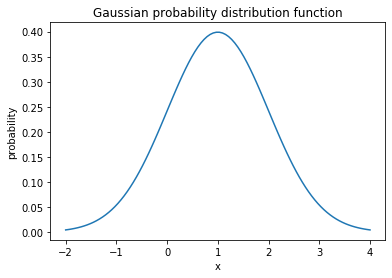

0.3989422804014327
0.24197072451914337
0.24197072451914337


In [71]:
plot_gaus(1,1)

# Test Gaussian PDF
print(calculate_probability(1.0, 1.0, 1.0))
print(calculate_probability(2.0, 1.0, 1.0))
print(calculate_probability(0.0, 1.0, 1.0))

Running it prints the probability of some input values. You can see that when the value is 1 and the mean and standard deviation is 1 our input is the most likely (top of the bell curve) and has the probability of 0.39.

We can see that when we keep the statistics the same and change the x value to 1 standard deviation either side of the mean value (2 and 0 or the same distance either side of the bell curve) the probabilities of those input values are the same at 0.24.

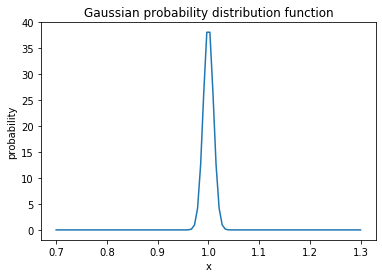

In [72]:
plot_gaus(1, 0.01)

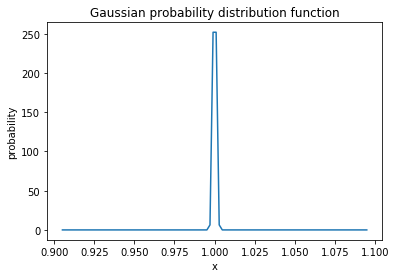

In [73]:
plot_gaus(1, 0.001)

<h1 style="color: orange;">Step 5: Class Probabilities</h1>

Now it is time to use the statistics calculated from our training data to calculate probabilities for new data.

Probabilities are calculated separately for each class. This means that we first calculate the probability that a new piece of data belongs to the first class, then calculate probabilities that it belongs to the second class, and so on for all the classes.

The probability that a piece of data belongs to a class is calculated as follows:

- $P(class|data)$ = $P(X|class)$ * $P(class)$

You may note that this is different from the Bayes Theorem described above.

The division has been removed to simplify the calculation.

This means that the result is no longer strictly a probability of the data belonging to a class. The value is still maximized, meaning that the calculation for the class that results in the largest value is taken as the prediction. This is a common implementation simplification as we are often more interested in the class prediction rather than the probability.

The input variables are treated separately, giving the technique it’s name “naive“. For the above example where we have 2 input variables, the calculation of the probability that a row belongs to the first class 0 can be calculated as:

- $P(class=0|X1,X2)$ = $P(X1|class=0)$ * $P(X2|class=0)$ * $P(class=0)$

Now you can see why we need to separate the data by class value. The Gaussian Probability Density function in the previous step is how we calculate the probability of a real value like X1 and the statistics we prepared are used in this calculation.

Below is a function named **calculate_class_probabilities()** that ties all of this together.

It takes a set of prepared summaries and a new row as input arguments.

- First the total number of training records is calculated from the counts stored in the summary statistics. This is used in the calculation of the probability of a given class or P(class) as the ratio of rows with a given class of all rows in the training data.

- Next, probabilities are calculated for each input value in the row using the Gaussian probability density function and the statistics for that column and of that class. Probabilities are multiplied together as they accumulated. This process is repeated for each class in the dataset.

- Finally a dictionary of probabilities is returned with one entry for each class.

In [74]:
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries]) # Gets the count of all rows
    probabilities = dict()
    
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows) # Gets the total record ratio - 5/10 - 0.5
        
        for i in range(len(class_summaries)):      
            mean, stdev, count = class_summaries[i]
            prob_x = calculate_probability(row[i], mean, stdev)
            probabilities[class_value] *= prob_x
            
    return probabilities

The example below first calculates the summary statistics by class for the training dataset, then uses these statistics to calculate the probability of the first record belonging to each class.

In [75]:
summaries = summarize_by_class(dataset)
probabilities = calculate_class_probabilities(summaries, dataset[0])
print(probabilities)

{0: 0.05032427673372076, 1: 0.00011557718379945765}


We can see that the probability of the first row belonging to the 0 class (0.0503) is higher than the probability of it belonging to the 1 class (0.0001). We would therefore correctly conclude that it belongs to the 0 class.

## Iris Flower Species Case Study
This section applies the Naive Bayes algorithm to the Iris flowers dataset.

The first step is to load the dataset and convert the loaded data to numbers that we can use with the mean and standard deviation calculations. For this we will use the helper function *load_csv()* to load the file, *str_column_to_float()* to convert string numbers to floats and *str_column_to_int()* to convert the class column to integer values.

We will evaluate the algorithm using k-fold cross-validation with 5 folds. This means that 150/5=30 records will be in each fold. We will use the helper functions **evaluate_algorithm()** to evaluate the algorithm with cross-validation and **accuracy_metric()** to calculate the accuracy of predictions.

A new function named **predict()** was developed to manage the calculation of the probabilities of a new row belonging to each class and selecting the class with the largest probability value.

Another new function named **naive_bayes()** was developed to manage the application of the Naive Bayes algorithm, first learning the statistics from a training dataset and using them to make predictions for a test dataset.

In [100]:
# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())

# Convert string column to integer
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
        print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Split the dataset by class values, returns a dictionary
def separate_by_class(dataset):
    separated = dict()
    for i in range(len(dataset)):
        vector = dataset[i]
        class_value = vector[-1]
        if (class_value not in separated):
            separated[class_value] = list()
        separated[class_value].append(vector)
    return separated
 
# Calculate the mean of a list of numbers
def mean(numbers):
    return sum(numbers)/float(len(numbers))
 
# Calculate the standard deviation of a list of numbers
def stdev(numbers):
    avg = mean(numbers)
    variance = sum([(x-avg)**2 for x in numbers]) / float(len(numbers)-1)
    return sqrt(variance)
 
# Calculate the mean, stdev and count for each column in a dataset
def summarize_dataset(dataset):
    summaries = [(mean(column), stdev(column), len(column)) for column in zip(*dataset)]
    del(summaries[-1])
    return summaries
 
# Split dataset by class then calculate statistics for each row
def summarize_by_class(dataset):
    separated = separate_by_class(dataset)
    summaries = dict()
    for class_value, rows in separated.items():
        summaries[class_value] = summarize_dataset(rows)
    return summaries
 
# Calculate the Gaussian probability distribution function for x
def calculate_probability(x, mean, stdev):
    exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
    return (1 / (sqrt(2 * pi) * stdev)) * exponent
 
# Calculate the probabilities of predicting each class for a given row
def calculate_class_probabilities(summaries, row):
    total_rows = sum([summaries[label][0][2] for label in summaries])
    probabilities = dict()
    for class_value, class_summaries in summaries.items():
        probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
        for i in range(len(class_summaries)):
            mean, stdev, _ = class_summaries[i]
            probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
    return probabilities
 
# Predict the class for a given row
def predict(summaries, row):
    probabilities = calculate_class_probabilities(summaries, row)
    best_label, best_prob = None, -1
    for class_value, probability in probabilities.items():
        if best_label is None or probability > best_prob:
            best_prob = probability
            best_label = class_value
    return best_label
 
# Make a prediction with Naive Bayes on Iris Dataset
filename = './datasets/iris.csv'
dataset = load_csv(filename)

for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
    
# convert class column to integers
str_column_to_int(dataset, len(dataset[0])-1)

# fit model
model = summarize_by_class(dataset)

# define a new record
row = [4.4,2.9,1.4,0.2]

# predict the label
label = predict(model, row)

print('Data=%s, Predicted: %s' % (row, label))

[Iris-versicolor] => 0
[Iris-setosa] => 1
[Iris-virginica] => 2
Data=[4.4, 2.9, 1.4, 0.2], Predicted: 1


## Conclusion
Naive Bayes algorithms are mostly used in sentiment analysis, spam filtering, recommendation systems etc. They are fast and easy to implement but their biggest disadvantage is that the requirement of predictors to be independent. In most of the real life cases, the predictors are dependent, this hinders the performance of the classifier.

Despite the algorithm being "Naive", naive Bayes often does a reasonably good job of picking the right class — it may not be that good at estimating absolute probabilities, but it is pretty good at measuring relative likelihoods.

If your end application requires precise estimates of probabilities, you will want to go with another algorithm.

Here are the links that I found really helpful:
- https://en.wikipedia.org/wiki/Gaussian_function
- https://towardsdatascience.com/understanding-the-naive-bayes-classifier-16b6ee03ff7b
- https://machinelearningmastery.com/continuous-probability-distributions-for-machine-learning/
- https://machinelearningmastery.com/classification-as-conditional-probability-and-the-naive-bayes-algorithm/
- https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/
- https://www.youtube.com/watch?v=Q8l0Vip5YUw (this one proved most helpful)
- https://www.youtube.com/watch?v=TYtX9RNsLl4